<a href="https://colab.research.google.com/github/sanjanasrinivas22/6thSem-ML-Lab/blob/main/1BM23CS301_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

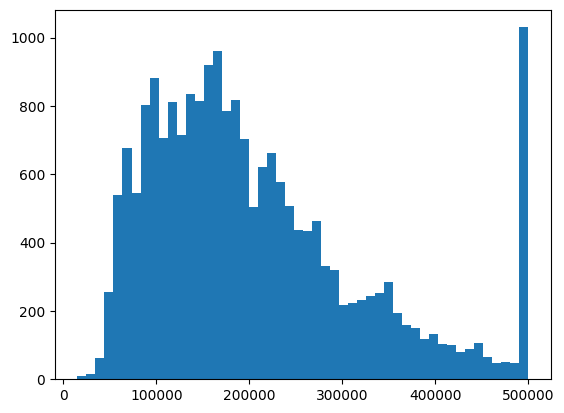

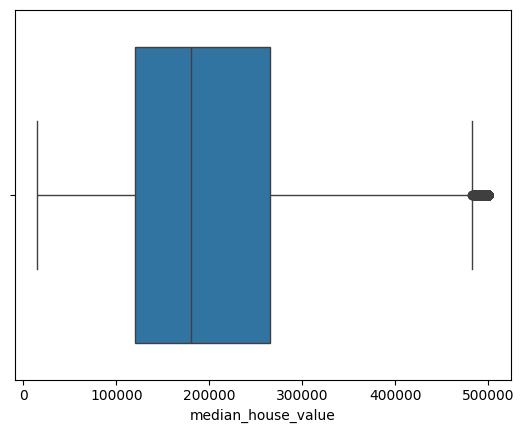

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


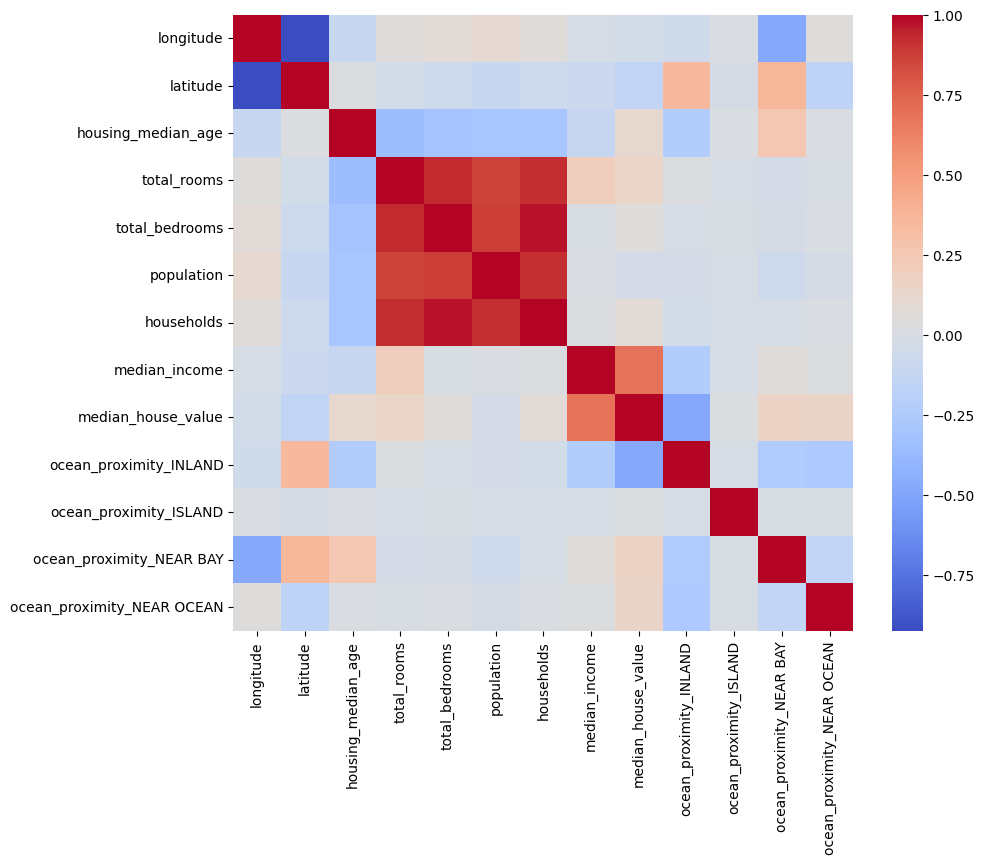

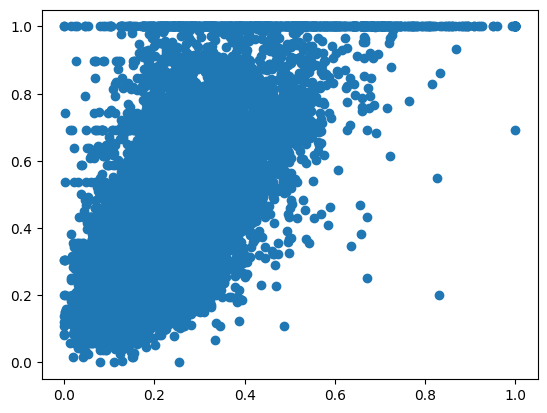

Trend: Positive
Relationship: Approximately Linear
Clusters: High income -> High house value clusters
Top 3 positive correlations
median_income                 0.689752
ocean_proximity_NEAR BAY      0.157825
ocean_proximity_NEAR OCEAN    0.144376
Name: median_house_value, dtype: float64
Most negative correlation
ocean_proximity_INLAND   -0.4863
Name: median_house_value, dtype: float64
RMSE: 0.14091099834503204
MAE: 0.10244397099317315
R2 Score: 0.6406554610648888


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("housing.csv")

# First 10 rows and datatypes
print(df.head(10))
print(df.dtypes)

# Basic statistics
print(df.describe())

# Histogram and boxplot
plt.hist(df["median_house_value"], bins=50)
plt.show()

sns.boxplot(x=df["median_house_value"])
plt.show()

# Missing value percentage
print(df.isnull().mean()*100)

# Impute missing values
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# One-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# MinMax scaling
num_cols = df.select_dtypes(include=[np.number]).columns
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])

# Stratified sampling
df["income_cat"] = pd.cut(df["median_income"],
                         bins=[0.,1.5,3.0,4.5,6.,np.inf],
                         labels=[1,2,3,4,5],
                         include_lowest=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

df = strat_train.drop("income_cat", axis=1)

# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

# Scatter plot
plt.scatter(df["median_income"], df["median_house_value"])
plt.show()

print("Trend: Positive")
print("Relationship: Approximately Linear")
print("Clusters: High income -> High house value clusters")

# Random split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

# Correlations
corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print("Top 3 positive correlations")
print(corr_target[1:4])
print("Most negative correlation")
print(corr_target.tail(1))

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)
